# Feature Selection
# ********************

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns

### Drop constant features
### **************************
#### In this step we will be removing the features which have constant features which are actually not important for solving the problem statement

In [8]:
df=pd.DataFrame({'A':[1,2,4,1,2,4],"B":[4,5,6,7,8,9],'C':[0,0,0,0,0,0],'D':[1,1,1,1,1,1]})

In [9]:
df

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1
5,4,9,0,1


#### In this data set feature C and D has same value. we use to drop this using VarianceThreshold

#### ---> Variance Threshhold ; features selection which drops all 0 variance features

In [10]:
df['C'].mean()

0.0

In [11]:
df['D'].mean()

1.0

In [14]:
#It will remove by default zero variance feature(same value in tables)
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df)


VarianceThreshold(threshold=0)

In [18]:
df.columns[var_thres.get_support()]

Index(['A', 'B'], dtype='object')

#### The array show True values are the features we want to select

In [20]:
constant_col=[col for col in data.columns if col not in df.columns[var_thres.get_support()]]
constant_col

['C', 'D']

#### The above code given constant features, now we can drop features C and D from our dataframe 

In [22]:
df.drop(['C','D'],inplace=True,axis=1)

In [23]:
df

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8
5,4,9


### Big data set

In [28]:
data=pd.read_csv('santander.csv',nrows=10000)

In [29]:
data.shape

(10000, 371)

In [30]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


### train test split

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop(['TARGET'],axis=1),data['TARGET'],test_size=0.3,random_state=42)

In [35]:

X_train

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
9069,18258,2,23,0.0,300.9,813.75,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
2603,5211,2,29,0.0,0.0,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69825.090000
7738,15572,2,25,0.0,0.0,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88115.130000
1579,3125,2,24,0.0,0.0,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150490.350000
5058,10101,2,33,0.0,0.0,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,11502,2,23,0.0,0.0,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78929.940000
5191,10394,2,49,0.0,0.0,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127000.770000
5390,10815,2,24,0.0,0.0,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95723.880000
860,1703,2,17,0.0,0.0,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101492.340000


In [37]:
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [38]:
#finding non-constant features
sum(var_thres.get_support())

281

#### These means our santander dataset has 281 relevant features out of 370 features

In [39]:
len(X_train.columns[var_thres.get_support()])

281

In [44]:
#find constant features
constant_columns=[col for col in X_train.columns if col not in X_train.columns[var_thres.get_support()]]
print(len(constant_columns))

89


In [47]:
constant_columns

['ind_var2_0',
 'ind_var2',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var18_0',
 'ind_var18',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var34_0',
 'ind_var34',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var18_0',
 'num_var18',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var13_medio',
 'saldo_var18',
 'saldo_var28',
 'saldo_var27',
 'saldo_var34',
 'saldo_var41',
 'saldo_var46',
 'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_imp_reemb_var17_1y3',
 'delta_imp_reemb_var33_1y3',
 'delta_imp_trasp_var17_in_1y3',
 'delta_imp_trasp_var17_out_1y3',
 'delta_imp_trasp_var33_out_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_reemb_var33_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_out_1y3',
 'imp_amort_var18_hace3',
 'imp_amort_var18_ult1',
 'imp_amo

In [45]:
281+89

370

In [48]:
X_train.drop(constant_columns,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
9069,18258,2,23,0.0,300.9,813.75,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
2603,5211,2,29,0.0,0.0,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69825.090000
7738,15572,2,25,0.0,0.0,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88115.130000
1579,3125,2,24,0.0,0.0,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150490.350000
5058,10101,2,33,0.0,0.0,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,11502,2,23,0.0,0.0,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78929.940000
5191,10394,2,49,0.0,0.0,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127000.770000
5390,10815,2,24,0.0,0.0,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95723.880000
860,1703,2,17,0.0,0.0,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101492.340000


### Feature Selection with Correlation
### ***************************************************

In [51]:
#from sklearn.datasets import fetch_california_housing
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
df=pd.read_csv('boston.csv')

In [58]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [59]:
X=df.drop('MEDV',axis=1)
y=df['MEDV']

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [61]:
X_train.shape

(354, 13)

In [63]:
X_test.shape

(152, 13)

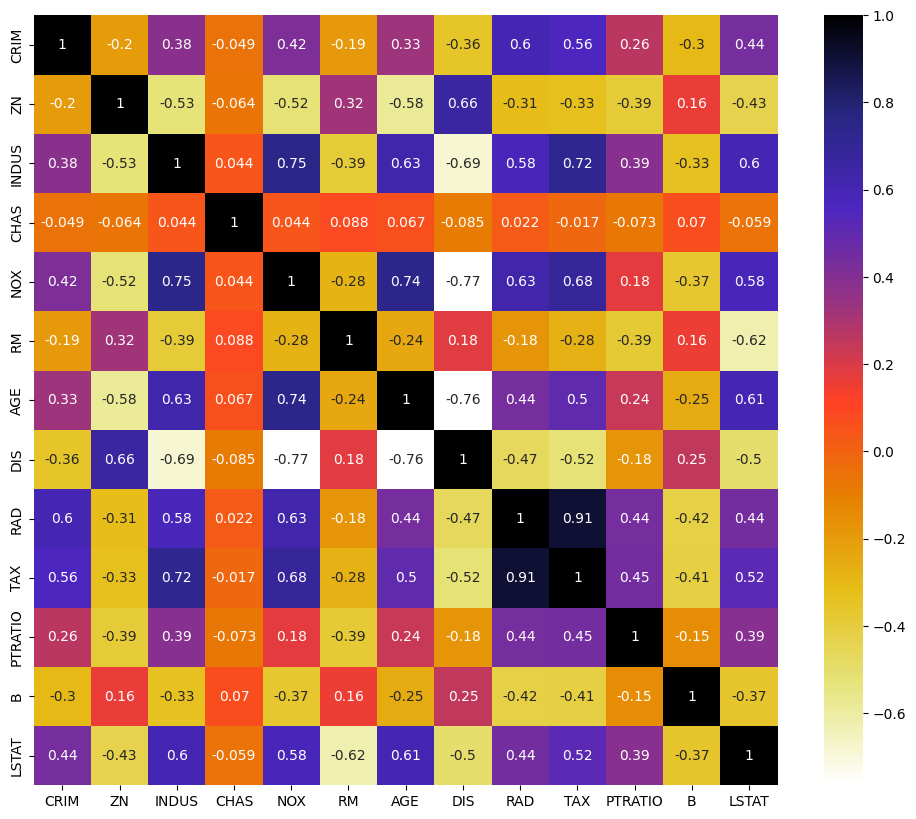

In [65]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True,cmap=plt.cm.CMRmap_r )
plt.show()

In [66]:
corr=X_train.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.196172,0.382073,-0.049364,0.416560,-0.188280,0.329927,-0.355840,0.603880,0.560570,0.264780,-0.299525,0.439369
ZN,-0.196172,1.000000,-0.529392,-0.063863,-0.523572,0.319260,-0.583885,0.658331,-0.314833,-0.327834,-0.392838,0.164641,-0.429178
INDUS,0.382073,-0.529392,1.000000,0.044224,0.750218,-0.392969,0.629257,-0.686848,0.578459,0.719038,0.388353,-0.331638,0.603374
CHAS,-0.049364,-0.063863,0.044224,1.000000,0.043748,0.088125,0.067269,-0.085492,0.022338,-0.017156,-0.072683,0.069682,-0.059060
NOX,0.416560,-0.523572,0.750218,0.043748,1.000000,-0.279202,0.740052,-0.765753,0.627188,0.683445,0.179046,-0.369445,0.577154
RM,-0.188280,0.319260,-0.392969,0.088125,-0.279202,1.000000,-0.235839,0.183857,-0.179242,-0.275242,-0.385526,0.157459,-0.623920
AGE,0.329927,-0.583885,0.629257,0.067269,0.740052,-0.235839,1.000000,-0.761543,0.440578,0.502429,0.239729,-0.250416,0.606530
DIS,-0.355840,0.658331,-0.686848,-0.085492,-0.765753,0.183857,-0.761543,1.000000,-0.467653,-0.519643,-0.176620,0.248376,-0.501780
RAD,0.603880,-0.314833,0.578459,0.022338,0.627188,-0.179242,0.440578,-0.467653,1.000000,0.907455,0.437687,-0.415325,0.442783
TAX,0.560570,-0.327834,0.719038,-0.017156,0.683445,-0.275242,0.502429,-0.519643,0.907455,1.000000,0.447518,-0.412145,0.515905


#### Funtion for selecting highly correlated features
### ******************************************
#### It will remove the first feature that is correlated with any other feature



In [72]:
def correlation(dataset,threshold):
    col_corr=set() # set of all  the names of correlated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: # wheather this correlation coefficient value is greater than our defined value
                colname=corr_matrix.columns[i]#store that column name
                col_corr.add(colname)#add that column name to set to avoid duplicates
    return col_corr

In [79]:
corr_features=correlation(X_train,0.7)
len(set(corr_features))

4

In [80]:
corr_features# these 4 features are 

{'AGE', 'DIS', 'NOX', 'TAX'}

In [81]:
X_train.drop(corr_features,axis=1,inplace=True)

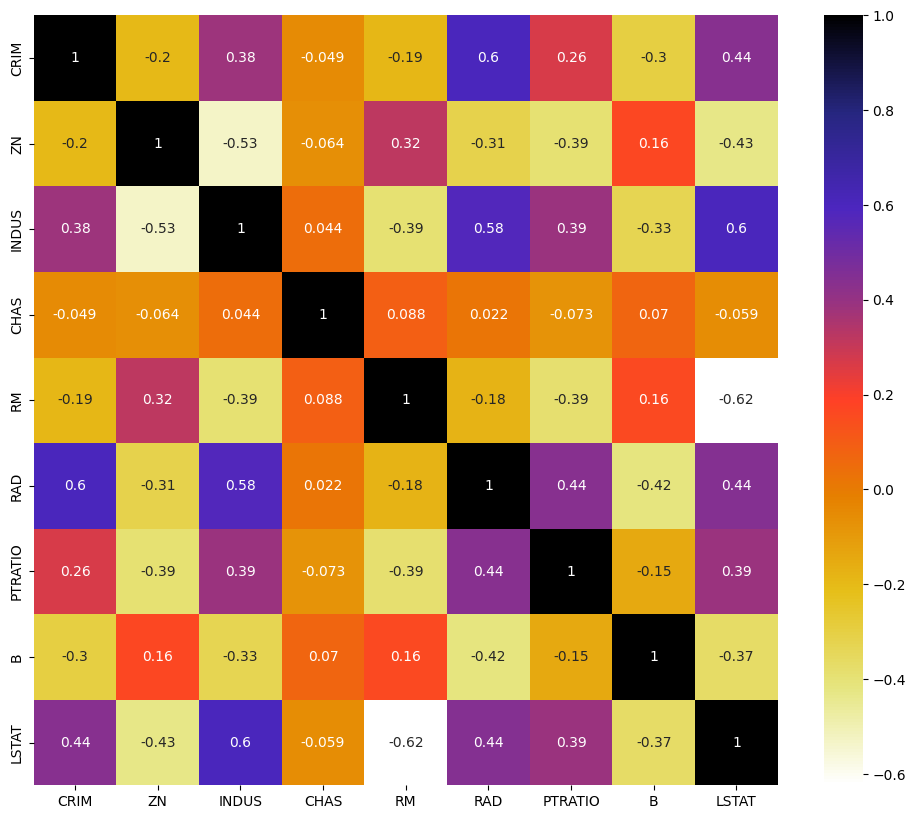

In [82]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True,cmap=plt.cm.CMRmap_r )
plt.show()

### ---------------------------------------------------------------------------------------------------------

## Information Gain-mutual information in Classification and Regression  Problem
## ************************************************************

### Mutual Information
#### *********************
#### MI
#### $I(X;Y)=H(X)-H(X|Y)$ Where $I(X|Y)$ is the mutual information of $X$ and $Y$,$H(X)$ is the entropy of X and $H(X|Y)$ is the conditional entropy of $X$ given $Y$. THe return has the units of bits. 

### Mutual information in classification
### ***************************************
#### Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher value mean higher dependency


In [28]:
df=pd.read_csv('wine.csv')
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### target/output variable is class

In [29]:
df.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X=df.drop('Class',axis=1)
y=df['Class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [32]:
X_train.shape

(124, 13)

In [33]:
X_train.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


In [36]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X_train,y_train)
mutual_info

array([0.40886548, 0.30122387, 0.1579489 , 0.25180262, 0.23002673,
       0.48836849, 0.71779789, 0.13807315, 0.27106466, 0.61283749,
       0.57332708, 0.53682308, 0.52330847])

In [40]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids                      0.717798
Color intensity                 0.612837
Hue                             0.573327
OD280/OD315 of diluted wines    0.536823
Proline                         0.523308
Total phenols                   0.488368
Alcohol                         0.408865
Malic acid                      0.301224
Proanthocyanins                 0.271065
Alcalinity of ash               0.251803
Magnesium                       0.230027
Ash                             0.157949
Nonflavanoid phenols            0.138073
dtype: float64

#### we can select wheather top 10 or top 20 features based on this

<Axes: >

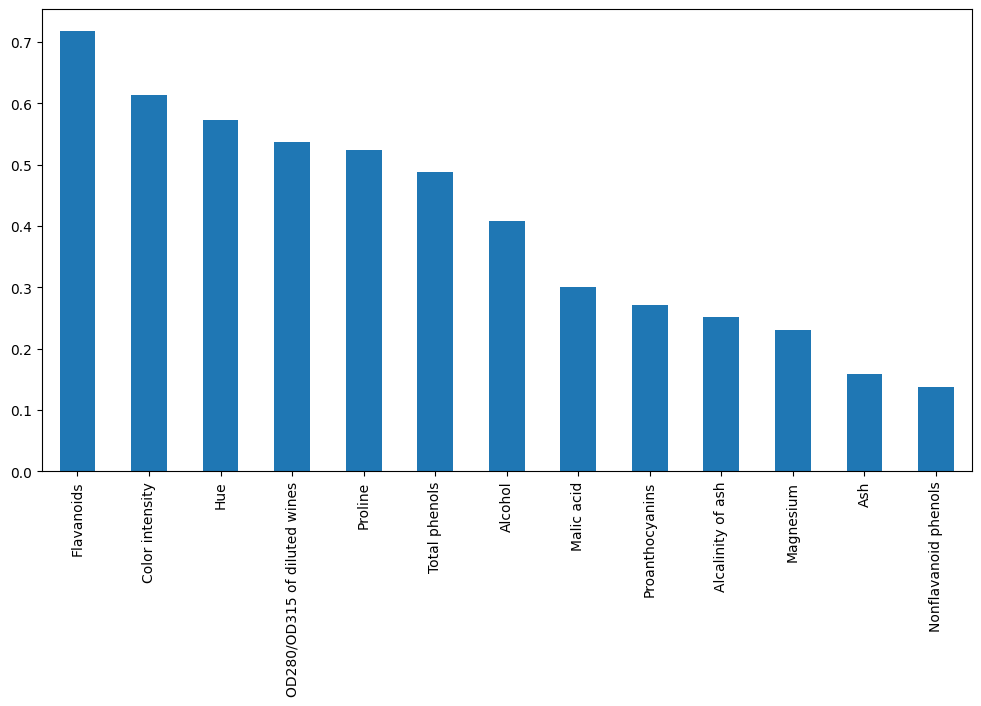

In [42]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(12,6))

#### we can use SelectKBest feature selection technique to select these features

In [44]:
from sklearn.feature_selection import SelectKBest
select_five=SelectKBest(mutual_info_classif,k=5)
select_five.fit(X_train,y_train)
X_train.columns[select_five.get_support()]

Index(['Flavanoids', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
       'Proline'],
      dtype='object')

### ----------------------------------------------------------------------------------------------------------

### Mutual information in Regression
### **************************************

In [2]:
#https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv
df=pd.read_csv('house.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

#### We are choosing numerical columns and not handling categorical columns

In [5]:
num_lst=['int64','float64']
num_cols=list(df.select_dtypes(include=num_lst).columns)
num_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [6]:
final_df=df[num_cols]
final_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [7]:
final_df.drop('Id',inplace=True,axis=1)

C:\Users\aksha\AppData\Local\Temp\ipykernel_23572\525900875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop('Id',inplace=True,axis=1)


In [8]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


#### we split  data to avoid overfitting

In [9]:
from sklearn.model_selection import train_test_split
X=final_df.drop('SalePrice',axis=1)
y=final_df['SalePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [10]:
X_train.shape

(1022, 36)

In [11]:
X_test.shape

(438, 36)

In [13]:
X_train.isnull().sum()

MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [14]:
X_train.fillna(0,inplace=True)

In [15]:
X_train.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [16]:
y_train.isnull().sum()

0

In [17]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(X_train,y_train)
mutual_info

array([2.55343902e-01, 2.13297023e-01, 1.65819812e-01, 5.31756774e-01,
       1.05897600e-01, 3.59031446e-01, 2.40292641e-01, 9.77424485e-02,
       1.66028140e-01, 4.66884178e-03, 1.14509060e-01, 3.84018471e-01,
       3.09161884e-01, 2.38964732e-01, 0.00000000e+00, 4.78631794e-01,
       2.49925006e-02, 0.00000000e+00, 2.58722013e-01, 7.53862541e-02,
       4.53085155e-02, 2.03718268e-02, 1.87321527e-01, 1.77376475e-01,
       2.67876808e-01, 3.70486498e-01, 3.66132495e-01, 6.87752891e-02,
       1.71246893e-01, 1.53263381e-02, 4.26564818e-03, 2.45157105e-02,
       3.99059724e-03, 2.90358670e-04, 0.00000000e+00, 0.00000000e+00])

In [21]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.531757
GrLivArea        0.478632
TotalBsmtSF      0.384018
GarageCars       0.370486
GarageArea       0.366132
YearBuilt        0.359031
1stFlrSF         0.309162
GarageYrBlt      0.267877
FullBath         0.258722
MSSubClass       0.255344
YearRemodAdd     0.240293
2ndFlrSF         0.238965
LotFrontage      0.213297
TotRmsAbvGrd     0.187322
Fireplaces       0.177376
OpenPorchSF      0.171247
BsmtFinSF1       0.166028
LotArea          0.165820
BsmtUnfSF        0.114509
OverallCond      0.105898
MasVnrArea       0.097742
HalfBath         0.075386
WoodDeckSF       0.068775
BedroomAbvGr     0.045309
BsmtFullBath     0.024993
ScreenPorch      0.024516
KitchenAbvGr     0.020372
EnclosedPorch    0.015326
BsmtFinSF2       0.004669
3SsnPorch        0.004266
PoolArea         0.003991
MiscVal          0.000290
BsmtHalfBath     0.000000
LowQualFinSF     0.000000
MoSold           0.000000
YrSold           0.000000
dtype: float64

<Axes: >

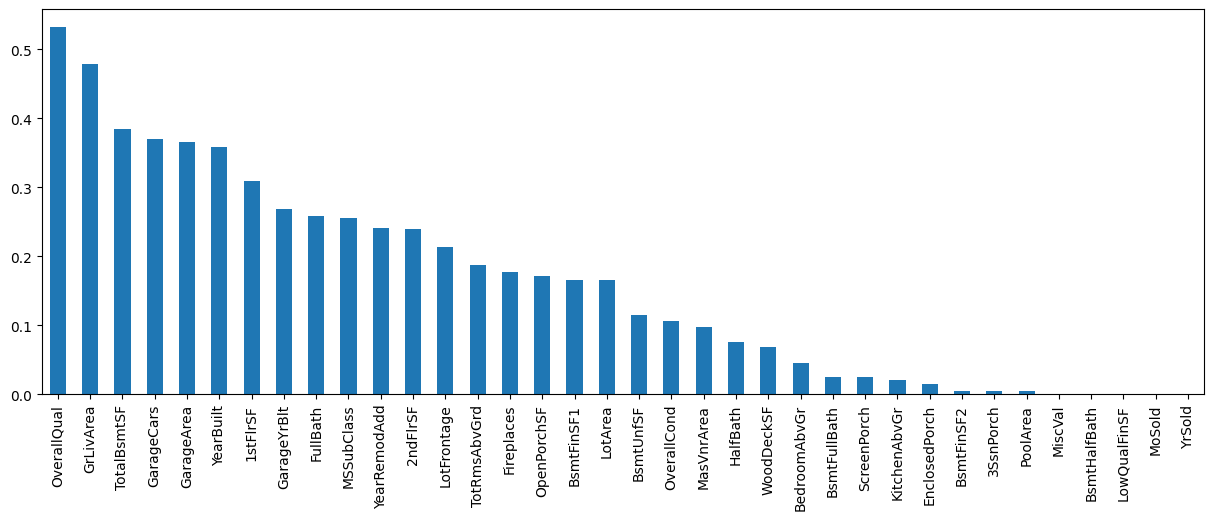

In [22]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

#### To choose features we use SelectPercentile
#### Select features according to a percentile of the highest scores.

In [23]:
from sklearn.feature_selection import SelectPercentile

In [25]:
select_top_cols=SelectPercentile(mutual_info_regression,percentile=20)#score function is the first paramter
select_top_cols.fit(X_train,y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x00000238E232E9E0>)

In [26]:
select_top_cols.get_support()

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [27]:
X_train.columns[select_top_cols.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

#### this code selects the top 20% of features from a dataset based on their dependence with the target variable as measured by mutual information regression.

### Difference Between Information Gain and Mutual Information
### *********************************************************************
#### $I(X;y)=H(X)-H(X|Y)$ and $IG(S,a)=H(S)-H(S|a)$
#### They are techinically same, that is they calculate the same quantity if applied to the same data.




### ---------------------------------------------------------------------------------------------------------

## Fisher Score- Chisquare Test For Feature Selection
## ***********************************************************

#### We compute chi-square stats between each non-negative feature and class

In [45]:
df=sns.load_dataset('titanic')#importing titanic dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [47]:
df_final=df[['sex','embarked','alone','pclass','survived']]
df_final.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [48]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sex       891 non-null    object
 1   embarked  889 non-null    object
 2   alone     891 non-null    bool  
 3   pclass    891 non-null    int64 
 4   survived  891 non-null    int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 28.8+ KB


#### Before applying chi square test, we need to convert these categorical features into numerical using label encoder

In [53]:
a=df_final['embarked'].mode()[0]
df_final['embarked'].fillna(a,inplace=True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_23572\865271873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['embarked'].fillna(a,inplace=True)


In [54]:
df_final.isnull().sum()

sex         0
embarked    0
alone       0
pclass      0
survived    0
dtype: int64

In [55]:
df_final['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [58]:
df_final['sex']=df_final['sex'].replace({'male':0,'female':1})
df_final['alone']=df_final['alone'].replace({False:0,True:1})
df_final['embarked']=df_final['embarked'].replace({'S':0,'C':1,'Q':2})

C:\Users\aksha\AppData\Local\Temp\ipykernel_23572\2750439100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['sex']=df_final['sex'].replace({'male':0,'female':1})
C:\Users\aksha\AppData\Local\Temp\ipykernel_23572\2750439100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['alone']=df_final['alone'].replace({False:0,True:1})
C:\Users\aksha\AppData\Local\Temp\ipykernel_23572\2750439100.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [59]:
df_final.head()

,sex,embarked,alone,pclass,survived
0,0,0,0,3,0
1,1,1,0,1,1
2,1,0,1,3,1
3,1,0,0,1,1
4,0,0,1,3,0


#### splitting the data

In [62]:
X=df_final.drop('survived',axis=1)
y=df_final['survived']

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [66]:
X_train.head()

,sex,embarked,alone,pclass
857,0,0,1,1
52,1,1,0,1
386,0,0,0,3
124,0,0,0,1
578,1,1,0,3


#### Performing Chi-square test

In [67]:
from sklearn.feature_selection import chi2
chi2=chi2(X_train,y_train)
chi2

(array([120.6057083 ,   8.8798725 ,   9.03328564,  21.61080949]),
 array([4.66154782e-28, 2.88331679e-03, 2.65107556e-03, 3.33964360e-06]))

#### The chisquare test returns two values
#### 1.F score:The F-score is calculated by taking the ratio of the variance between the sample means to the variance within the samples
#### 2.P-value: the p-value is calculated by comparing the calculated chi-square test statistic to the chi-square distribution with degrees of freedom equal to the number of categories minus one.

#### To know which columns we are doing the same thing to convert it and showing

In [80]:
X_train.columns

Index(['sex', 'embarked', 'alone', 'pclass'], dtype='object')

In [88]:
a=pd.DataFrame({'F_score':chi2[0],'P_value':chi2[1]})
a.index=X_train.columns
a

,F_score,P_value
sex,120.605708,4.661548e-28
embarked,8.879873,2.883317e-03
alone,9.033286,2.651076e-03
pclass,21.610809,3.339644e-06


### Observations
### ***************
#### From chi square test we can see that "sex" feature is more important feature among these categorical data

In [3]:
from imblearn.under_sampling import RandomUnderSampler

In [4]:
from imblearn.over_sampling import SMOTE

In [5]:
from sklearn.feature_selection import RFE

In [6]:
from sklearn.feature_selection import SequentialFeatureSelector

In [7]:
r'[^a-zA-Z0-9\s]'

'[^a-zA-Z0-9\\s]'

In [19]:
a=r'[^a-zA-Z]'

In [21]:
import re
if re.search(a,'ajay'):
    print(True)
else:
    print(False)

False


In [38]:
import re

# Define a regular expression pattern to match special characters
special_characters_pattern = r'[^a-zA-Z\s]+@gmail\.com'

# Input string to check for special characters
input_string = "Hello@hotmail.com"

# Use re.search() to check if the input string contains any special characters
if re.search(special_characters_pattern, input_string):
    print("Input string contains special characters")
else:
    print("Input string does not contain special characters")

Input string does not contain special characters


In [43]:
import re

# Define a regular expression pattern to match special characters followed by "@gmail.com"
special_characters_pattern = r'[^a-zA-Z\s]+@gmail\.com'

# Input string to check for the pattern
input_string = "Hello@gmail.com"

# Use re.search() to check if the input string matches the pattern
if re.search(special_characters_pattern, input_string):
    print("Input string contains special characters followed by '@gmail.com'")
else:
    print("Input string does not match the pattern")

Input string does not match the pattern


In [48]:
a="ajay123"
a.isalnum()

False

In [61]:
import pandas as pd
df=pd.DataFrame({'date':['1,2,12','1,2,13','1,3,14'],'name':['ajay','rohith','hanan']})

In [77]:
df.append({'date':'1,2,14','name':'Sreya'},ignore_index=True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_1620\1893290081.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append({'date':'1,2,14','name':'Sreya'},ignore_index=True)


,date,name
0,"1,2,12",ajay
1,"1,2,13",rohith
2,"1,3,14",hanan
3,"1,2,14",Sreya


In [65]:
df.iloc[:2,:1]

,date
0,"1,2,12"
1,"1,2,13"


In [66]:
df.loc[:2,['date']]

,date
0,"1,2,12"
1,"1,2,13"
2,"1,3,14"


In [78]:
df.iloc[:1,:]

,date,name
0,"1,2,12",ajay


In [79]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
s=SequentialFeatureSelector

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3 non-null      object
 1   name    3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [58]:
df['date']=pd.to_datetime(df['date'],format='%d,%m,%y')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3 non-null      datetime64[ns]
 1   name    3 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 176.0+ bytes


In [60]:
df.head()

,date,name
0,2012-02-01,ajay
1,2013-02-01,rohith
2,2014-03-01,hanan


TypeError: Axes3D.scatter() missing 2 required positional arguments: 'xs' and 'ys'

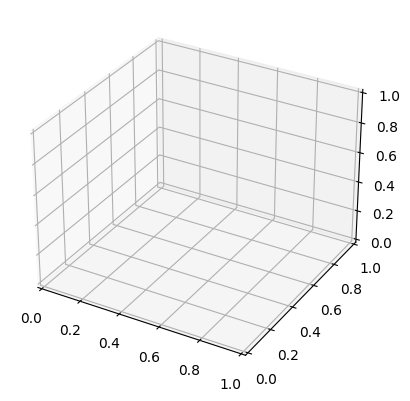

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 3, 4, 5, 6]
z = [3, 4, 5, 6, 7]

# Create a figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot using Seaborn
sns.scatterplot(x=x, y=y, z=z, ax=ax, color='r', marker='o')

# Set labels for the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Set the title
plt.title('3D Scatter Plot')

# Show the plot
plt.show()